<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 02
## Laboratorio Clase 06: Desarrollo de Algoritmos

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com. 
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
* __La entrega es al final de esta clase.__

__Nombre__: Brandon Olguin

__Rol__: 201510027-6

## Ejercicio 1 (2 ptos.): 
Utilizando los datos del Gasto Fiscal Neto de Chile, crea una nueva columna del tipo `datetime` llamada `dt_date` utilizando `anio`, `mes` y el día primero de cada mes.

In [2]:
import os
import numpy as np
import pandas as pd

Utilizaremos como ejemplo un dataset de gasto fiscal neto en Chile, obtenidos de una [datathon de DataCampfire](https://datacampfire.com/datathon/).

In [3]:
gasto_raw = pd.read_csv(os.path.join("data", "gasto_fiscal.csv"), sep=";")
gasto_raw.head()

,anio,mes,partida,capitulo,programa,subtitulo,monto
0,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,21082
1,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,BIENES Y SERVICIOS DE CONSUMO,152607
2,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,GASTOS EN PERSONAL,552668
3,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,INICIATIVAS DE INVERSIÓN,4741
4,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Proyecto Fortalecimiento Institucional,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,26107


Pasos a seguir:

1. Renombra la columna `anio` por `year`.
2. Crea la columna `month` utilizando el diccionario `es_month_dict` definido abajo. Hint: Usar un mapeo.
3. Crea la columna `day` en que todos los registros sean igual a `1`.
4. Crea la columna `dt_date` con la función `pd.to_datetime`. Lee la documentación!
5. Finalmente, elimina las columnas `year`, `mes`, `month`, `day`.

In [4]:
es_month_dict = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3, 
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

In [6]:
gasto = (
    gasto_raw.rename(columns={'anio':'year'})
    .assign(
        month=lambda x: x["mes"].str.lower().map(es_month_dict),
        day=1,
        dt_date=lambda df: pd.to_datetime(df[['year','month','day']])
    ).drop(columns={'year','mes','month','day'})
)
gasto.head()

,partida,capitulo,programa,subtitulo,monto,dt_date
0,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,21082,2009-04-01
1,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,BIENES Y SERVICIOS DE CONSUMO,152607,2009-04-01
2,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,GASTOS EN PERSONAL,552668,2009-04-01
3,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,INICIATIVAS DE INVERSIÓN,4741,2009-04-01
4,Congreso Nacional,Biblioteca Del Congreso,Proyecto Fortalecimiento Institucional,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,26107,2009-04-01


## Ejercicio 2 (1 pto.)

Pivotea el dataframe `gasto_raw` tal que:

- Los índices sean los ministerios (partidas).
- Las columnas sean los años.
- Cada celda sea la suma de los montos.
- Rellenar las celdas vacías con `""`.

¿Cuáles son las combinaciones de Año-Ministerio que no tienen gasto?

In [12]:
df = gasto_raw.pivot_table(
    index='partida',
    columns='anio',
    values='monto',
    aggfunc='sum',
    fill_value='',
)
answ = list(df[df=='']
            .dropna(how='all')
            .dropna(how='all',axis=1)
            .stack().index)

In [13]:
#__Respuesta__:
answ

[('Ministerio De Energía', 2009),
 ('Ministerio De La Mujer Y La Equidad De Género', 2009),
 ('Ministerio De La Mujer Y La Equidad De Género', 2010),
 ('Ministerio De La Mujer Y La Equidad De Género', 2011),
 ('Ministerio De La Mujer Y La Equidad De Género', 2012),
 ('Ministerio De La Mujer Y La Equidad De Género', 2013),
 ('Ministerio De La Mujer Y La Equidad De Género', 2014),
 ('Ministerio De La Mujer Y La Equidad De Género', 2015),
 ('Ministerio Del Deporte', 2009),
 ('Ministerio Del Deporte', 2010),
 ('Ministerio Del Deporte', 2011),
 ('Ministerio Del Deporte', 2012),
 ('Ministerio Del Deporte', 2013),
 ('Ministerio Del Medio Ambiente', 2009),
 ('Servicio Electoral', 2009),
 ('Servicio Electoral', 2010),
 ('Servicio Electoral', 2011),
 ('Servicio Electoral', 2012),
 ('Servicio Electoral', 2013),
 ('Servicio Electoral', 2014),
 ('Servicio Electoral', 2015),
 ('Servicio Electoral', 2016)]

## Ejercicio 3 (1 pto.)

Realiza los benchmarks del archivo `benchmark_loop.py` que se encuentra en el directorio `fast_pandas`.

¿Cuál forma dirías que es la más eficiente?

Utiliza el comando mágico `%load` y edita de tal manera que el módulo `Benchmarker` se importe correctamente.

Benchmarking function:  df_values
	Testing with a dataframe of size:  100
	Result (seconds):  2.4579419987276195e-05
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0001655322901206091
	Testing with a dataframe of size:  10000
	Result (seconds):  0.0024121334019582717
	Testing with a dataframe of size:  100000
	Result (seconds):  0.017642831499688327
	Testing with a dataframe of size:  1000000
	Result (seconds):  0.15367345098638907
Benchmarking function:  itertuples_function
	Testing with a dataframe of size:  100
	Result (seconds):  0.0006091390398796648
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0015353559097275138
	Testing with a dataframe of size:  10000
	Result (seconds):  0.008979099499993027
	Testing with a dataframe of size:  100000
	Result (seconds):  0.08182055670185946
	Testing with a dataframe of size:  1000000
	Result (seconds):  0.8856457709916867
Benchmarking function:  iterrows_function
	Testing with a dataframe of size:  100
	Result 

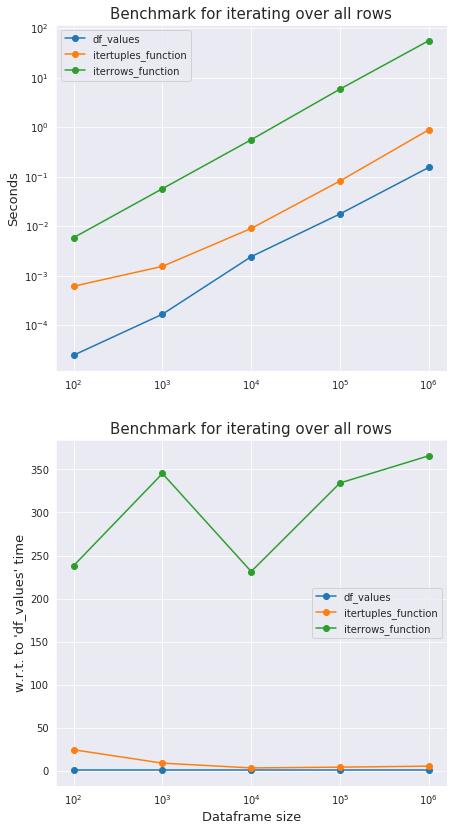

In [17]:
# %load  fast_pandas/benchmark_loop.py
from fast_pandas.Benchmarker import Benchmarker


def iterrows_function(df):
    for index, row in df.iterrows():
        pass


def itertuples_function(df):
    for row in df.itertuples():
        pass


def df_values(df):
    for row in df.values:
        pass



params = {
    "df_generator": 'pd.DataFrame(np.random.randint(1, df_size, (df_size, 4)), columns=list("ABCD"))',
    "functions_to_evaluate": [df_values, itertuples_function, iterrows_function],
    "title": "Benchmark for iterating over all rows",
    "user_df_size_powers": [2, 3, 4, 5, 6],
    "user_loop_size_powers": [2, 2, 1, 1, 1],
}

benchmark = Benchmarker(**params)
benchmark.benchmark_all()
benchmark.print_results()
benchmark.plot_results()


__Respuesta__:
df_values es más eficiente, pero intertuples se acerca mucho para una gran cantidad de datos.